# Inheritance

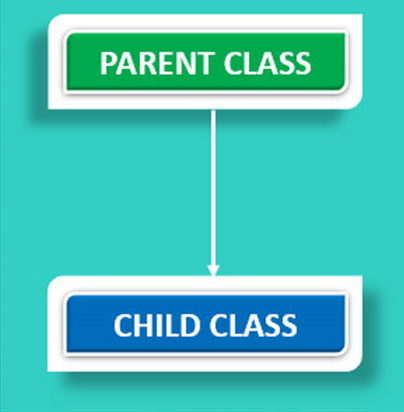

## Child class will inherit attributes and methods of the parent class

# Single Inheritance
Parent -> Child
One parent class one child class

In [1]:
class Person:

    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def intro(self):
        print(f"My name is {self.name}. I am {self.age} years old")

In [2]:
class Employee(Person):

    def __init__(self, name: str, age: int, company: str):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work at {self.company}")

In [3]:
p1 = Person(name="Rahul", age=28)
print(type(p1))

<class '__main__.Person'>


In [14]:
print(p1)

In [4]:
p1.name

'Rahul'

In [5]:
p1.age

28

In [6]:
p1.intro()

My name is Rahul. I am 28 years old


In [7]:
e1 = Employee(name="Sarthak", age=30, company="TCS")
print(type(e1))

<class '__main__.Employee'>


In [8]:
e1.name

'Sarthak'

In [9]:
e1.age

30

In [10]:
e1.company

'TCS'

In [11]:
e1.work()

I work at TCS


In [12]:
e1.intro()

My name is Sarthak. I am 30 years old


In [13]:
e1.intro()
e1.work()

My name is Sarthak. I am 30 years old
I work at TCS


In [15]:
print(e1)

In [16]:
e2 = Employee(name="Aditi", age=35, company="Infosys")
print(type(e2))

<class '__main__.Employee'>


In [17]:
e2.name

'Aditi'

In [18]:
e2.age

35

In [19]:
e2.company

'Infosys'

In [20]:
e2.intro()
e2.work()

My name is Aditi. I am 35 years old
I work at Infosys


## I want to do easy data validation 
## Library Pydantic -> to validate data
### Pydantic contains class called BaseModel -> Validates the data for you
### Field is used add different constraints on data

In [21]:
!uv add pydantic

Resolved 124 packages in 25ms
Audited 119 packages in 1ms


# Keywords
1. ge - greater than or equal to
2. le - less than or equal to
3. gt - greater than
4. lt - less than

In [25]:
from pydantic import BaseModel, Field
from typing import Literal


class Student(BaseModel):
    roll_no: int = Field(ge=1, le=1000)
    name: str = Field(min_len=2, max_length=40)
    gender: Literal["male", "female"]
    marks: float = Field(ge=0, le=100)
    hobbies: list[str] = Field(default_factory=list)

    def get_info(self):
        print(f"Student roll no. : {self.roll_no}")
        print(f"Student name : {self.name}")
        print(f"Student gender : {self.gender}")
        print(f"Marks : {self.marks:.2f}")
        print(f"Hobbies : {self.hobbies}")

In [26]:
s1 = Student(
    roll_no=1, name="Raman", gender="male", marks=83.5, hobbies=["singing", "dancing"]
)
print(s1)

roll_no=1 name='Raman' gender='male' marks=83.5 hobbies=['singing', 'dancing']


In [27]:
s1.roll_no

1

In [28]:
s1.name

'Raman'

In [29]:
s1.gender

'male'

In [30]:
s1.marks

83.5

In [31]:
s1.hobbies

['singing', 'dancing']

In [32]:
s1.get_info()

Student roll no. : 1
Student name : Raman
Student gender : male
Marks : 83.50
Hobbies : ['singing', 'dancing']


In [34]:
# Model dump function is inherited from BaseModel
s1.model_dump()

{'roll_no': 1,
 'name': 'Raman',
 'gender': 'male',
 'marks': 83.5,
 'hobbies': ['singing', 'dancing']}

In [40]:
s2 = Student(roll_no=-3, name="Aditi", gender="female", marks=75.6, hobbies=["reading"])

ValidationError: 1 validation error for Student
roll_no
  Input should be greater than or equal to 1 [type=greater_than_equal, input_value=-3, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/greater_than_equal

In [41]:
s3 = Student(
    roll_no=1, name=1234, gender="male", marks=83.5, hobbies=["singing", "dancing"]
)

ValidationError: 1 validation error for Student
name
  Input should be a valid string [type=string_type, input_value=1234, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type

In [42]:
s2 = Student(roll_no=3, name="Aditi", gender="f", marks=75.6, hobbies=["reading"])

ValidationError: 1 validation error for Student
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='f', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/literal_error

In [44]:
s2 = Student(roll_no=3, name="Aditi", gender="female", marks=150, hobbies=["reading"])

ValidationError: 1 validation error for Student
marks
  Input should be less than or equal to 100 [type=less_than_equal, input_value=150, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/less_than_equal

In [48]:
s2 = Student(roll_no=3, name="Aditi", gender="female", marks=78.5, hobbies="cricket")

ValidationError: 1 validation error for Student
hobbies
  Input should be a valid list [type=list_type, input_value='cricket', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/list_type

In [49]:
s2 = Student(roll_no=3, name="Aditi", gender="female", marks=78.5, hobbies=["cricket"])

In [50]:
s2.roll_no

3

In [51]:
s2.name

'Aditi'

In [52]:
s2.get_info()

Student roll no. : 3
Student name : Aditi
Student gender : female
Marks : 78.50
Hobbies : ['cricket']


In [53]:
print(s2)

roll_no=3 name='Aditi' gender='female' marks=78.5 hobbies=['cricket']


In [54]:
s2

Student(roll_no=3, name='Aditi', gender='female', marks=78.5, hobbies=['cricket'])

In [55]:
s2.model_dump()

{'roll_no': 3,
 'name': 'Aditi',
 'gender': 'female',
 'marks': 78.5,
 'hobbies': ['cricket']}

# Multiple Inheritance
Multiple Parent class -> single child class

In [64]:
class BaseSalary:

    def __init__(self, base_salary: float):
        self.base_salary = base_salary

    def get_base_salary(self):
        return self.base_salary

In [65]:
class Bonus:

    def __init__(self, bonus_per: float):
        self.bonus_per = bonus_per

    def calculate_bonus(self, base_salary: float):
        return (self.bonus_per / 100) * base_salary

    def get_bonus_per(self):
        return self.bonus_per

In [66]:
class Tax:

    def __init__(self, tax_rate: float):
        self.tax_rate = tax_rate

    def calculate_tax(self, gross_salary: float):
        return (self.tax_rate / 100) * gross_salary

    def get_tax_rate(self):
        return self.tax_rate

In [67]:
class TotalSalary(BaseSalary, Bonus, Tax):

    def __init__(self, base_salary: float, bonus_per: float, tax_rate: float):
        BaseSalary.__init__(self, base_salary)
        Bonus.__init__(self, bonus_per)
        Tax.__init__(self, tax_rate)

    def calculate_salary_details(self) -> dict:
        bonus_amt = Bonus.calculate_bonus(self, self.base_salary)
        gross_salary = self.base_salary + bonus_amt
        tax_amt = Tax.calculate_tax(self, gross_salary)
        net_salary = gross_salary - tax_amt
        return {
            "base_salary": self.base_salary,
            "bonus_per": self.bonus_per,
            "bonus_amt": bonus_amt,
            "tax_rate": self.tax_rate,
            "tax_amt": tax_amt,
            "net_salary": net_salary,
        }

In [ ]:
t1 = TotalSalary(base_salary=15_000, bonus_per=15, tax_rate=12)
print(type(t1))

<class '__main__.TotalSalary'>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
t1.base_salary

15000

In [70]:
t1.bonus_per

15

In [71]:
t1.tax_rate

12

In [72]:
t1.calculate_salary_details()

{'base_salary': 15000,
 'bonus_per': 15,
 'bonus_amt': 2250.0,
 'tax_rate': 12,
 'tax_amt': 2070.0,
 'net_salary': 15180.0}

In [73]:
t2 = TotalSalary(base_salary=50_000, bonus_per=30, tax_rate=15)
print(type(t2))

<class '__main__.TotalSalary'>


In [74]:
t2.calculate_salary_details()

{'base_salary': 50000,
 'bonus_per': 30,
 'bonus_amt': 15000.0,
 'tax_rate': 15,
 'tax_amt': 9750.0,
 'net_salary': 55250.0}

In [75]:
t2.get_base_salary()

50000

In [76]:
t2.get_bonus_per()

30

In [78]:
t2.calculate_bonus(t2.get_base_salary())

15000.0

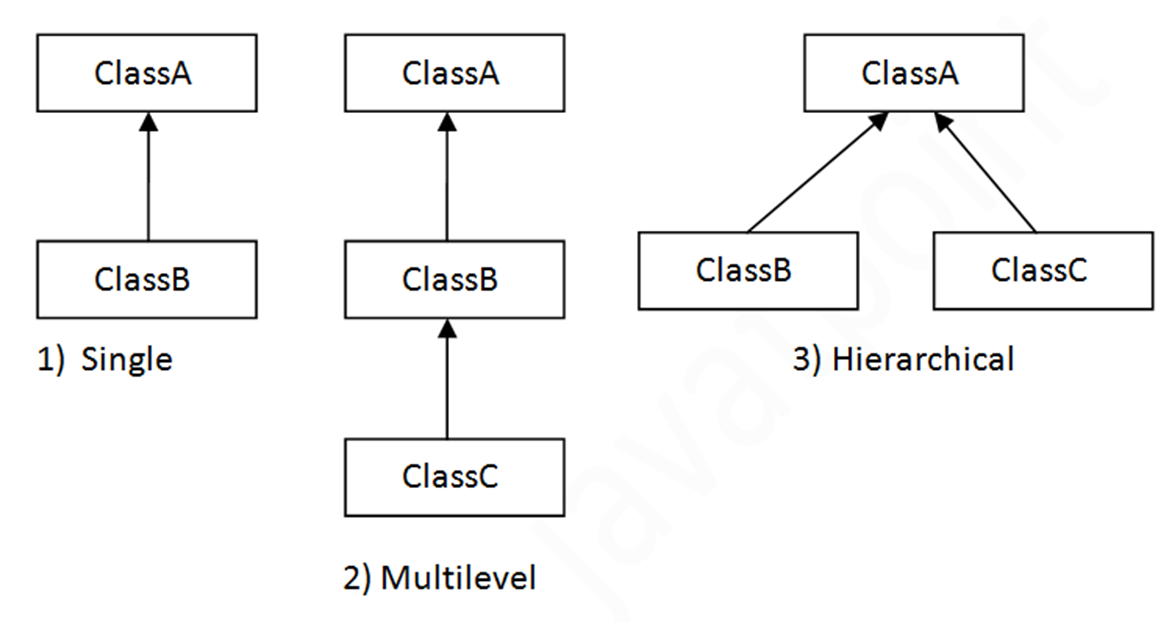

# Multilevel Inheritance

In [79]:
class Employee2:

    def __init__(self, emp_id: int, name: str):
        self.emp_id = emp_id
        self.name = name

    def get_employee_info(self):
        print(f"Employee id : {self.emp_id}, Name : {self.name}")

In [80]:
class Manager(Employee2):

    def __init__(self, emp_id: int, name: str, department: str):
        super().__init__(emp_id, name)
        self.department = department

    def get_department(self):
        print(f"Manager Department : {self.department}")

In [81]:
class ProjectManager(Manager):

    def __init__(self, emp_id: int, name: str, department: str, project: str):
        super().__init__(emp_id, name, department)
        self.project = project

    def get_project(self):
        print(f"Project name : {self.project}")

In [82]:
e1 = Employee2(emp_id=105, name="Rahul")

In [83]:
e1.emp_id

105

In [84]:
e1.name

'Rahul'

In [85]:
e1.get_employee_info()

Employee id : 105, Name : Rahul


In [86]:
m1 = Manager(emp_id=103, name="Sarthak", department="Mechanical")

In [87]:
m1.emp_id

103

In [88]:
m1.name

'Sarthak'

In [89]:
m1.department

'Mechanical'

In [90]:
m1.get_department()

Manager Department : Mechanical


In [91]:
m1.get_employee_info()

Employee id : 103, Name : Sarthak


In [92]:
m1.get_employee_info()
m1.get_department()

Employee id : 103, Name : Sarthak
Manager Department : Mechanical


In [97]:
pm1 = ProjectManager(
    emp_id=102, name="Aditi", department="Mechanial", project="Drivetrain"
)

In [98]:
pm1.emp_id

102

In [99]:
pm1.name

'Aditi'

In [100]:
pm1.department

'Mechanial'

In [101]:
pm1.project

'Drivetrain'

In [102]:
pm1.get_project()

Project name : Drivetrain


In [103]:
pm1.get_department()

Manager Department : Mechanial


In [104]:
pm1.get_employee_info()

Employee id : 102, Name : Aditi


In [105]:
pm1.get_employee_info()
pm1.get_department()
pm1.get_project()

Employee id : 102, Name : Aditi
Manager Department : Mechanial
Project name : Drivetrain


# Hierarchical inheritance
1. Single Parent class
2. Multiple child class

In [110]:
class Shape:

    def perimeter(self):
        pass

    def area(self):
        pass

    def print_area_and_perimeter(self):
        print(f"Perimeter : {self.perimeter():.2f}")
        print(f"Area : {self.area():.2f}")

In [111]:
class Rectangle(Shape):

    def __init__(self, length: float, height: float):
        super().__init__()
        self.length = length
        self.height = height

    def perimeter(self):
        return 2 * (self.length + self.height)

    def area(self):
        return self.length * self.height

In [112]:
import math


class Circle(Shape):

    def __init__(self, radius: float):
        super().__init__()
        self.radius = radius

    def perimeter(self):
        return 2 * math.pi * self.radius

    def area(self):
        return math.pi * (self.radius**2)

In [113]:
r = Rectangle(length=10, height=5)
print(type(r))

<class '__main__.Rectangle'>


In [114]:
r.perimeter()

30

In [115]:
r.area()

50

In [116]:
r.print_area_and_perimeter()

Perimeter : 30.00
Area : 50.00


In [117]:
c = Circle(radius=21)
print(type(c))

<class '__main__.Circle'>


In [118]:
c.perimeter()

131.94689145077132

In [119]:
c.area()

1385.4423602330987

In [120]:
c.print_area_and_perimeter()

Perimeter : 131.95
Area : 1385.44
